In [28]:
#libreria para peticiones http
import requests as rq
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#Realizar una peticion get a la api
respuesta = rq.get('https://pomber.github.io/covid19/timeseries.json')

# Guardar el archivo en formato json con los datos de casos Covid-19 de la api
datoscovid = respuesta.json()

# Leemos el archivo json con los datos de casos Covid-19 
#(en caso de que el archivo se haya descargado y este de manera local)
#datoscovid = pandas.read_json("covid.json", typ='series', orient="index", encoding="utf-8")

In [21]:
# Seleccionamos el País 
datos = pd.DataFrame(datoscovid['Ecuador']) 
 
# Formateamos la fecha
datos['date'] = pd.to_datetime(datos['date'])
ff = datos['date'].dt.strftime('%d-%m-%Y')
datos['date'] = ff
 
# Imprimo los datos 
datos

,date,confirmed,deaths,recovered
0,22-01-2020,0,0,0
1,23-01-2020,0,0,0
2,24-01-2020,0,0,0
3,25-01-2020,0,0,0
4,26-01-2020,0,0,0
...,...,...,...,...
98,29-04-2020,24675,883,1557
99,30-04-2020,24934,900,1558
100,01-05-2020,26336,1063,1913
101,02-05-2020,27464,1371,2132


In [27]:
# Cambiar nombre de las columnas 
datos.columns = ['Fecha','Confirmados' , 'Muertes', 'Recuperados'] 
#texto en negrita
txt_negrita = '\033[1m' 
# Imprimo el texto 
print(txt_negrita + 'Ecuador')
datos

Ecuador


,Fecha,Confirmados,Muertes,Recuperados
0,22-01-2020,0,0,0
1,23-01-2020,0,0,0
2,24-01-2020,0,0,0
3,25-01-2020,0,0,0
4,26-01-2020,0,0,0
...,...,...,...,...
98,29-04-2020,24675,883,1557
99,30-04-2020,24934,900,1558
100,01-05-2020,26336,1063,1913
101,02-05-2020,27464,1371,2132


In [32]:
# Declaro la cantidad de muertes que quiero seleccionar 
cantidad1 = 100
 
# Comparo si la columna 'Muertes' es igual o mayor al valor de la variable 'cantidad 
rs = datos.loc[datos['Muertes'] >= cantidad1] 
 
# Color de texto negrita
class color:
   txt_negrita = '\033[1m'
 
# Imprimo el texto 'Día'
print(color.txt_negrita + 'Primer Día en superar las 100 muertes:')
 
# Imprimo el primer día en que el País supero más de 100 muertes 
dia1=rs.iloc[0,0]
dia = rs.iloc[0] 
dia


Primer Día en superar las 100 muertes:


Fecha          02-04-2020
Confirmados          3163
Muertes               120
Recuperados            65
Name: 71, dtype: object

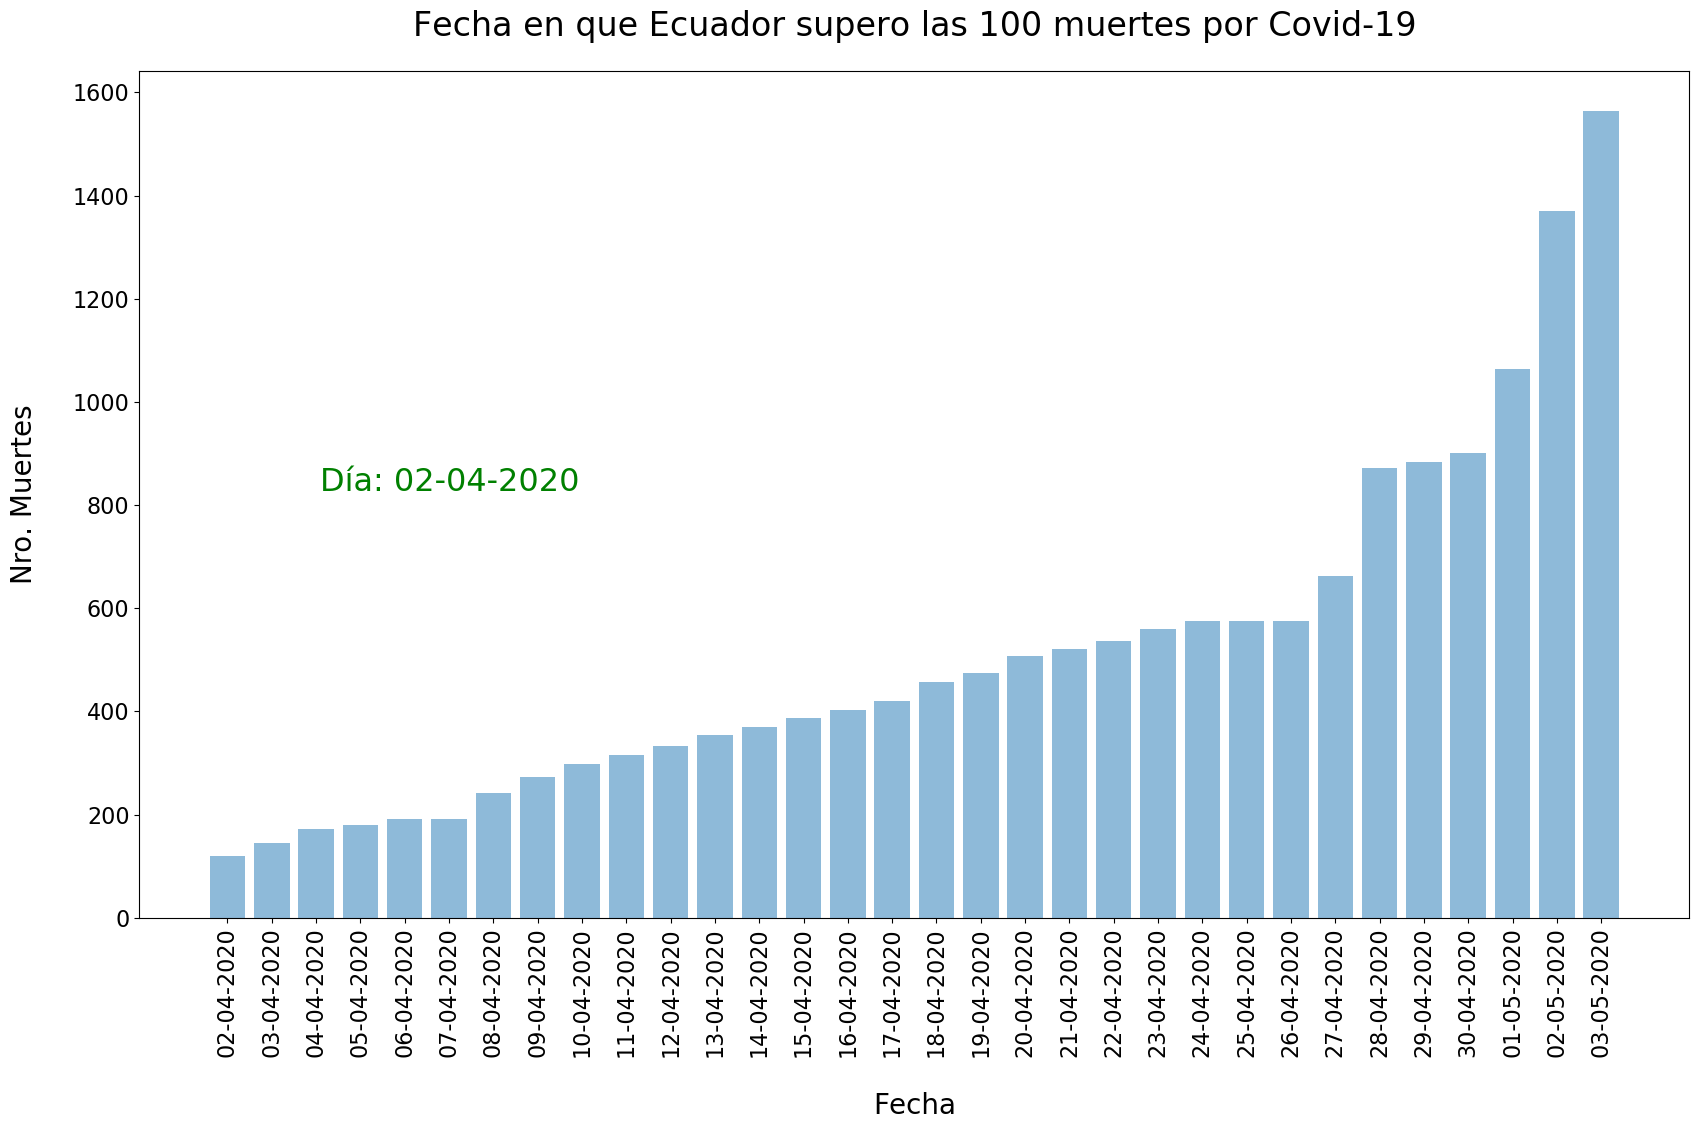

In [36]:
# Tamaño del gráfico 
plt.rcParams["figure.figsize"] = 20,11
 
# Defino los campos del gráfico 
fechas = rs['Fecha']
#len:permite conocer el tamaño del arreglo o coleccion
posicion_y = np.arange(len(fechas))
muertes = rs['Muertes']
 
# Formateo los elementos del gráfico 
plt.bar(posicion_y, muertes, align='center', alpha=0.5)
plt.xticks(posicion_y, fechas)
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=16)
 
# Defino el título y las etiquetas (labels) del gráfico 
plt.title('Fecha en que Ecuador supero las 100 muertes por Covid-19', fontsize=24, pad=25)
plt.suptitle('Día: ' + dia1, x=0.28, y=0.52, fontsize=23, color="green") #Imprimo el día con letras verdes 
plt.xlabel('Fecha', fontsize=20, labelpad=25)
plt.ylabel('Nro. Muertes', fontsize=20, labelpad=25)
 
# Imprimo el gráfico 
plt.show()

In [38]:
# Declaro la cantidad de casos confirmados que quiero seleccionar 
cantidad_casos = 10000
 
# Comparo si la columna 'Confirmados' es igual o mayor al valor de la variable 'cantidad 
rs_casos = datos.loc[datos['Confirmados'] >= cantidad_casos] 

# Imprimo el texto 'Día'
print(color.txt_negrita + 'Primer Día en superar los 10000 casos confirmados:')
 
# Imprimo el primer día en que el País supero más de 10000 casos confirmados 
dia1_casos=rs_casos.iloc[0,0]
dia_casos = rs_casos.iloc[0] 
dia_casos

Primer Día en superar los 10000 casos confirmados:


Fecha          20-04-2020
Confirmados         10128
Muertes               507
Recuperados          1150
Name: 89, dtype: object

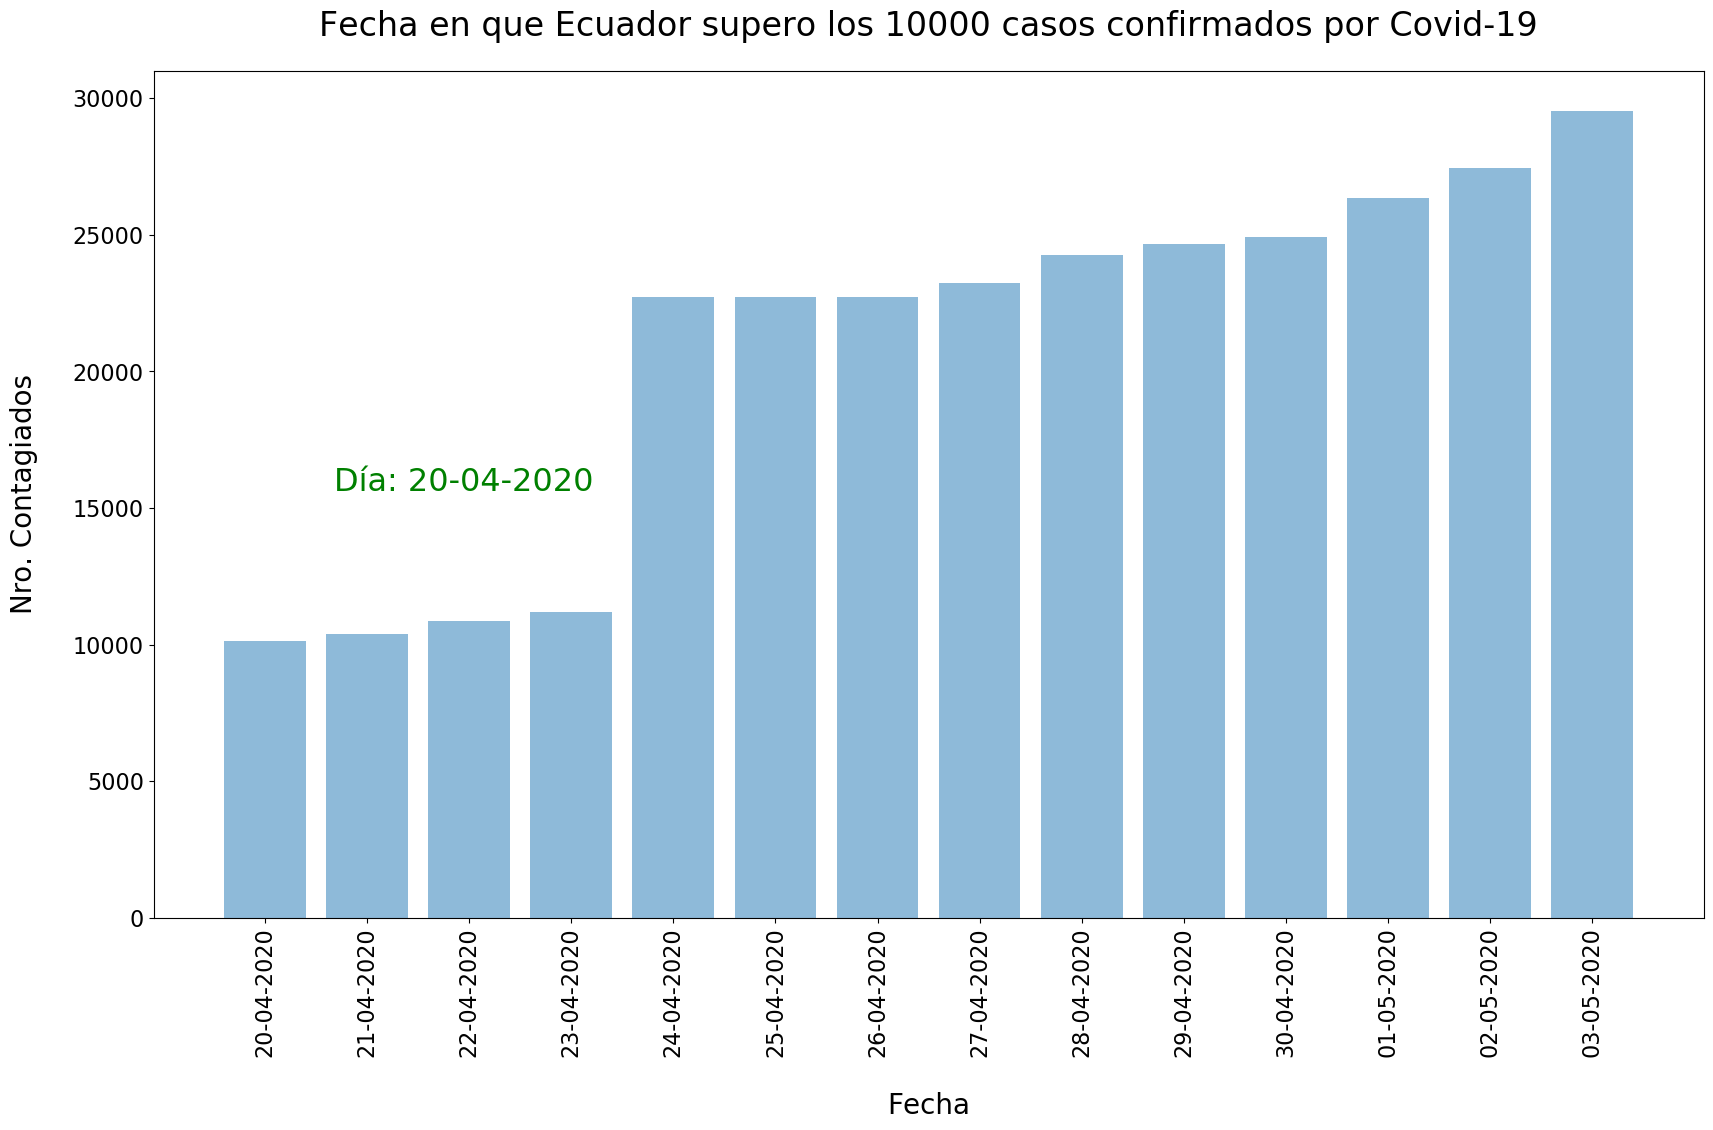

In [40]:
# Tamaño del gráfico 
plt.rcParams["figure.figsize"] = 20,11
 
# Defino los campos del gráfico 
fechas = rs_casos['Fecha']
#len:permite conocer el tamaño del arreglo o coleccion
posicion_y = np.arange(len(fechas))
muertes = rs_casos['Confirmados']
 
# Formateo los elementos del gráfico 
plt.bar(posicion_y, muertes, align='center', alpha=0.5)
plt.xticks(posicion_y, fechas)
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=16)
 
# Defino el título y las etiquetas (labels) del gráfico 
plt.title('Fecha en que Ecuador supero los 10000 casos confirmados por Covid-19', fontsize=24, pad=25)
plt.suptitle('Día: ' + dia1_casos, x=0.28, y=0.52, fontsize=23, color="green") #Imprimo el día con letras verdes 
plt.xlabel('Fecha', fontsize=20, labelpad=25)
plt.ylabel('Nro. Contagiados', fontsize=20, labelpad=25)
 
# Imprimo el gráfico 
plt.show()